# Caso del avión con Python

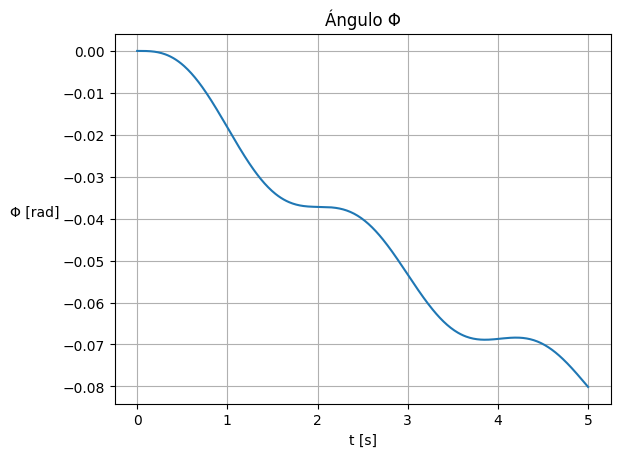

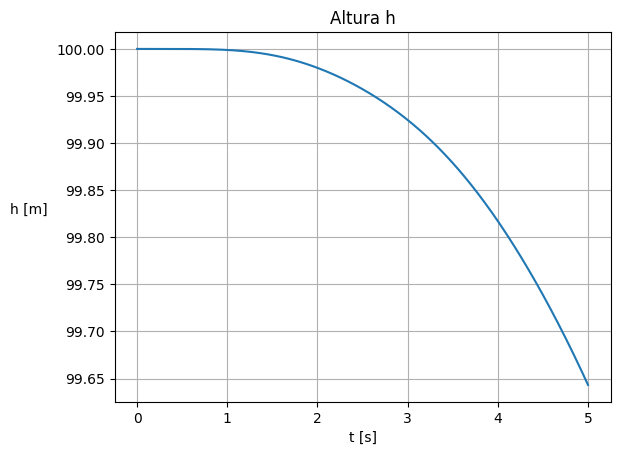

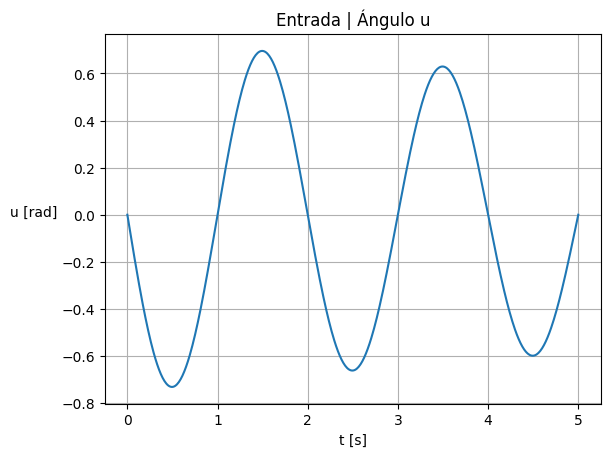

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig

def modavion(t_etapa, xant, accion):

  # xant=[alfa,fi,fi_p,h]
  a     = 0.01
  b     = 2
  c     = 100
  omega = 0.2
  At    = 10e-3
  u     = accion

  # xant=[alfa,fi,fi_p,h]
  alfa  = xant[0][0]
  fi    = xant[1][0]
  fi_p  = xant[2][0]
  h     = xant[3][0]
  x     = xant
  alfa_p  = 0
  fi_pp   = 0
  h_p     = 0

  for i in range(int(t_etapa/At)):
    # xp = A*x+B*u; 
    alfa_p  = a*(fi - alfa)
    fi_pp   = (-omega**2)*(fi - alfa - b*u)
    h_p     = c*alfa
    
    xp      = np.array([[alfa_p], [fi_p], [fi_pp], [h_p]])
    x       = x + xp*At
    
    alfa    = x[0][0]
    fi      = x[1][0]
    fi_p    = x[2][0]
    h       = x[3][0]
    X       = x
  return X

X       = [[0], [0], [0], [100]]
t_etapa = 1e-2
tF      = 5
Ts      = t_etapa
ii      = 0
x2      = np.zeros(int(tF/t_etapa))
x4      = np.zeros(int(tF/t_etapa))
acc     = np.zeros(int(tF/t_etapa))
t       = np.linspace(0,tF,int(tF/t_etapa))

for i in t:
  x2[ii]  = X[1][0]
  x4[ii]  = X[3][0]
  X       = modavion(t_etapa, X, -0.75*np.sin(np.pi*i)*np.exp(-i/20))
  acc[ii] = -0.75*np.sin(np.pi*i)*np.exp(-i/20)
  ii      += 1


fig, ax = plt.subplots(dpi=100)
ax.plot(t,x2)
ax.set_title("Ángulo \u03A6")
ax.set_xlabel("t [s]")
ax.set_ylabel("\u03A6 [rad]", rotation=0, labelpad=20)
ax.grid(visible="true", which="both", axis="both")
plt.savefig("drive/MyDrive/Colab Notebooks/angulo_phi-5seg.png",bbox_inches="tight",pad_inches=0.15,dpi=300)

fig, bx = plt.subplots(dpi=100)
bx.plot(t,x4)
bx.set_title("Altura h")
bx.set_xlabel("t [s]")
bx.set_ylabel("h [m]", rotation=0, labelpad=20)
bx.grid(visible="true", which="both", axis="both")
plt.savefig("drive/MyDrive/Colab Notebooks/altura_h-5seg.png",bbox_inches="tight",pad_inches=0.15,dpi=300)

fig, cx = plt.subplots(dpi=100)
cx.plot(t,acc)
cx.set_title("Entrada | Ángulo u")
cx.set_xlabel("t [s]")
cx.set_ylabel("u [rad]", rotation=0, labelpad=20)
plt.grid(visible="true", which="both", axis="both")
plt.savefig("drive/MyDrive/Colab Notebooks/entrada_u-5seg.png",bbox_inches="tight",pad_inches=0.15,dpi=300)

plt.show()